# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
filepath = r'/content/drive/My Drive/NB/preprocessed_data.csv'
data = pd.read_csv(filepath)
print(data.head(10))
print(data.shape)
print(data.columns.values)
print(data['project_is_approved'].value_counts())

  school_state  ...    price
0           ca  ...   725.05
1           ut  ...   213.03
2           ca  ...   329.00
3           ga  ...   481.04
4           wa  ...    17.74
5           ca  ...   102.50
6           ca  ...  1418.08
7           ca  ...   495.29
8           ca  ...   299.99
9           hi  ...   479.94

[10 rows x 9 columns]
(109248, 9)
['school_state' 'teacher_prefix' 'project_grade_category'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'
 'clean_categories' 'clean_subcategories' 'essay' 'price']
1    92706
0    16542
Name: project_is_approved, dtype: int64


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [ ]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)
data['project_is_approved'].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

In [ ]:
print(data['teacher_number_of_previously_posted_projects'].max())
print(data['teacher_number_of_previously_posted_projects'].min())

451
0


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
#print(X_cv.shape)
#print(y_cv.shape)

(73196, 8) (73196,)
(36052, 8) (36052,)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_essay = CountVectorizer(min_df=10,max_features=5000,ngram_range=(1,4))
vectorizer_essay.fit(X_train['essay'].values)
X_train_essay_bow_Set1 = vectorizer_essay.transform(X_train['essay'].values)
#X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow_Set1 = vectorizer_essay.transform(X_test['essay'].values)

print(X_train_essay_bow_Set1.shape,y_train.shape)
print(X_test_essay_bow_Set1.shape,y_test.shape)
#print(X_cv_essay_bow.shape,y_cv.shape)

(73196, 5000) (73196,)
(36052, 5000) (36052,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer = TfidfVectorizer(min_df=10,max_features=5000)
TfidfVectorizer.fit(X_train['essay'].values)
X_train_essay_tfidf_Set2 = TfidfVectorizer.transform(X_train['essay'].values)
#X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf_Set2 = TfidfVectorizer.transform(X_test['essay'].values)

print(X_train_essay_tfidf_Set2.shape,y_train.shape)
print(X_test_essay_tfidf_Set2.shape,y_test.shape)
#print(X_cv_essay_bow.shape,y_cv.shape)

(73196, 5000) (73196,)
(36052, 5000) (36052,)


In [ ]:
import pickle
filename = '/content/drive/My Drive/NB/glove_vectors'
with open(filename, 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

BOW

Categorical Features

In [ ]:
vectorizer_School_State = CountVectorizer()
vectorizer_School_State.fit(X_train['school_state'].values)
X_train_school_state_bow = vectorizer_School_State.transform(X_train['school_state'].values)
#X_cv_school_state_bow = vectorizer.transform(X_cv['school_state'].values)
X_test_school_state_bow = vectorizer_School_State.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_school_state_bow.shape,y_train.shape)
print(X_test_school_state_bow.shape,y_test.shape)
#print(X_cv_school_state_bow.shape,y_cv.shape)

After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)


In [ ]:
vectorizer_Teacher_Prefix = CountVectorizer()
vectorizer_Teacher_Prefix.fit(X_train['teacher_prefix'].values)
X_train_teacher_prefix_bow = vectorizer_Teacher_Prefix.transform(X_train['teacher_prefix'].values)
#X_cv_teacher_prefix_bow = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix_bow = vectorizer_Teacher_Prefix.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_prefix_bow.shape,y_train.shape)
print(X_test_teacher_prefix_bow.shape,y_test.shape)
#print(X_cv_teacher_prefix_bow.shape,y_cv.shape)

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)


In [ ]:
vectorizer_Project_Grade_Cat = CountVectorizer()
vectorizer_Project_Grade_Cat.fit(X_train['project_grade_category'].values)
X_train_project_grade_category_bow = vectorizer_Project_Grade_Cat.transform(X_train['project_grade_category'].values)
#X_cv_project_grade_category_bow = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_project_grade_category_bow = vectorizer_Project_Grade_Cat.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_project_grade_category_bow.shape,y_train.shape)
print(X_test_project_grade_category_bow.shape,y_test.shape)
#print(X_cv_project_grade_category_bow.shape,y_cv.shape)

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)


In [ ]:
vectorizer_Clean_Cat = CountVectorizer()
vectorizer_Clean_Cat.fit(X_train['clean_categories'].values)
X_train_clean_categories_bow = vectorizer_Clean_Cat.transform(X_train['clean_categories'].values)
#X_cv_clean_categories_bow = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_categories_bow = vectorizer_Clean_Cat.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_categories_bow.shape,y_train.shape)
print(X_test_clean_categories_bow.shape,y_test.shape)
#print(X_cv_clean_categories_bow.shape,y_cv.shape)

After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)


In [ ]:
vectorizer_clean_subcategories = CountVectorizer()
vectorizer_clean_subcategories.fit(X_train['clean_subcategories'].values)
X_train_clean_subcategories_bow = vectorizer_clean_subcategories.transform(X_train['clean_subcategories'].values)
#X_cv_clean_subcategories_bow = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_bow = vectorizer_clean_subcategories.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcategories_bow.shape,y_train.shape)
print(X_test_clean_subcategories_bow.shape,y_test.shape)
#print(X_cv_clean_subcategories_bow.shape,y_cv.shape)

After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)


In [ ]:
from sklearn.preprocessing import Normalizer
normalizer_price = Normalizer()
#print(X_train['price'].values.shape)
normalizer_price.fit(X_train['price'].values.reshape(1,-1))
X_train_price_norm = normalizer_price.transform(X_train['price'].values.reshape(1,-1))
#X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer_price.transform(X_test['price'].values.reshape(1,-1))

X_train_price_norm = X_train_price_norm.reshape(-1,1)
#X_cv_price_norm = X_cv_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)

print("After normalizations")
print(X_train_price_norm.shape,y_train.shape)
print(X_test_price_norm.shape,y_test.shape)
#print(X_cv_price_norm.shape,y_cv.shape)

After normalizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [ ]:
print(X_train_price_norm[0])

[0.00388808]


In [ ]:
from sklearn.preprocessing import Normalizer
normalizer_Teacher_PPP = Normalizer()
normalizer_Teacher_PPP.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_train_teacher_number_of_previously_posted_projects_norm = normalizer_Teacher_PPP.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
#X_cv_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer_Teacher_PPP.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_number_of_previously_posted_projects_norm = X_train_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
#X_cv_teacher_number_of_previously_posted_projects_norm = X_cv_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
X_test_teacher_number_of_previously_posted_projects_norm = X_test_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)

print("After normalizations")
print(X_train_teacher_number_of_previously_posted_projects_norm.shape,y_train.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape,y_test.shape)
#print(X_cv_teacher_number_of_previously_posted_projects_norm.shape,y_cv.shape)

print(X_train_teacher_number_of_previously_posted_projects_norm[0:2])

After normalizations
(73196, 1) (73196,)
(36052, 1) (36052,)
[[0.        ]
 [0.00012386]]


In [ ]:
from scipy.sparse import hstack
X_tr_set1 = hstack((X_train_essay_bow_Set1, X_train_school_state_bow, X_train_teacher_prefix_bow,X_train_project_grade_category_bow,X_train_clean_categories_bow,X_train_clean_subcategories_bow,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
#X_cr = hstack((X_cv_essay_bow, X_cv_school_state_bow, X_cv_teacher_prefix_bow,X_cv_project_grade_category_bow,X_cv_clean_categories_bow,X_cv_clean_subcategories_bow,X_cv_price_norm,X_cv_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_te_set1 = hstack((X_test_essay_bow_Set1, X_test_school_state_bow, X_test_teacher_prefix_bow,X_test_project_grade_category_bow,X_test_clean_categories_bow,X_test_clean_subcategories_bow,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print("Final Data matrix")
print(X_tr_set1.shape, y_train.shape)
#print(X_cr.shape, y_cv.shape)
print(X_te_set1.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 5101) (73196,)
(36052, 5101) (36052,)


In [ ]:
X_tr_set2 = hstack((X_train_essay_tfidf_Set2, X_train_school_state_bow, X_train_teacher_prefix_bow,X_train_project_grade_category_bow,X_train_clean_categories_bow,X_train_clean_subcategories_bow,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
#X_cr = hstack((X_cv_essay_bow, X_cv_school_state_bow, X_cv_teacher_prefix_bow,X_cv_project_grade_category_bow,X_cv_clean_categories_bow,X_cv_clean_subcategories_bow,X_cv_price_norm,X_cv_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_te_set2 = hstack((X_test_essay_tfidf_Set2, X_test_school_state_bow, X_test_teacher_prefix_bow,X_test_project_grade_category_bow,X_test_clean_categories_bow,X_test_clean_subcategories_bow,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print("Final Data matrix")
print(X_tr_set2.shape, y_train.shape)
#print(X_cr.shape, y_cv.shape)
print(X_te_set2.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 5101) (73196,)
(36052, 5101) (36052,)


In [ ]:
print(X_tr[0:2])

  (0, 32)	1.0
  (0, 82)	1.0
  (0, 167)	1.0
  (0, 214)	1.0
  (0, 226)	2.0
  (0, 354)	1.0
  (0, 476)	9.0
  (0, 478)	1.0
  (0, 480)	2.0
  (0, 481)	1.0
  (0, 515)	1.0
  (0, 608)	1.0
  (0, 632)	2.0
  (0, 676)	3.0
  (0, 699)	3.0
  (0, 859)	1.0
  (0, 860)	1.0
  (0, 925)	1.0
  (0, 937)	1.0
  (0, 984)	1.0
  (0, 1079)	1.0
  (0, 1083)	1.0
  (0, 1125)	1.0
  (0, 1141)	1.0
  (0, 1151)	1.0
  :	:
  (1, 4446)	1.0
  (1, 4518)	2.0
  (1, 4554)	2.0
  (1, 4555)	1.0
  (1, 4584)	1.0
  (1, 4615)	2.0
  (1, 4642)	1.0
  (1, 4645)	2.0
  (1, 4675)	2.0
  (1, 4678)	1.0
  (1, 4699)	1.0
  (1, 4778)	1.0
  (1, 4861)	1.0
  (1, 4910)	2.0
  (1, 4926)	1.0
  (1, 4937)	1.0
  (1, 4948)	1.0
  (1, 4954)	1.0
  (1, 5040)	1.0
  (1, 5053)	1.0
  (1, 5059)	1.0
  (1, 5064)	1.0
  (1, 5086)	1.0
  (1, 5087)	1.0
  (1, 5099)	0.0019796511458714814


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
classifier = MultinomialNB(alpha = 500)
classifier.fit(X_tr_set1,y_train)
#a = classifier.transform(X_tr,y_train)
y_pred_proba = classifier.predict_proba(X_tr_set1[0:10])
y_pred = classifier.predict(X_tr_set1)
print(y_pred)
print(y_pred.shape)
acc_score = accuracy_score(y_train,y_pred)
print(acc_score)


[1 1 1 ... 1 1 1]
(73196,)
0.8445543472320892


In [ ]:
classifier = MultinomialNB(alpha = 500)
classifier.fit(X_tr_set2,y_train)
#a = classifier.transform(X_tr,y_train)
y_pred_proba = classifier.predict_proba(X_tr_set2[0:10])
y_pred = classifier.predict(X_tr_set2)
print(y_pred)
print(y_pred.shape)
acc_score = accuracy_score(y_train,y_pred)
print(acc_score)

[1 1 1 ... 1 1 1]
(73196,)
0.8485846221104978


100%|██████████| 7/7 [00:00<00:00,  7.28it/s]


[0.7125935843488715, 0.7125935843488715, 0.7125525985026504, 0.7124023170665064, 0.7130444286573037, 0.8167112956992185, 0.8476692715448931]


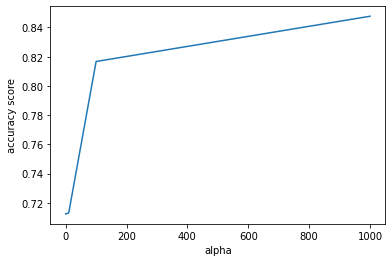

0.846582713857761


In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt
alpha = [.0001,.001,.1,1,10,100,1000]
acc_score = list()
for i in tqdm(alpha):
  classifier = MultinomialNB(alpha = i)
  classifier.fit(X_tr_set1,y_train)
  #a = classifier.transform(X_tr,y_train)
  #y_pred_proba = classifier.predict_proba(X_tr[0:10])
  y_pred = classifier.predict(X_tr_set1)
  acc_score.append(accuracy_score(y_train,y_pred))
print(acc_score)

#Best_alpha = 800
classifier = MultinomialNB(alpha = 800)
classifier.fit(X_tr_set1,y_train)
y_pred_test = classifier.predict(X_te_set1)
acc_score_test = accuracy_score(y_test,y_pred_test)

plt.plot(alpha,acc_score)
plt.xlabel('alpha')
plt.ylabel('accuracy score')
plt.show()

print(acc_score_test)

100%|██████████| 7/7 [00:00<00:00,  9.10it/s]


[0.8487349035466419, 0.8487349035466419, 0.8487212415979015, 0.8485982840592382, 0.8483796928793923, 0.8485846221104978, 0.8485846221104978]


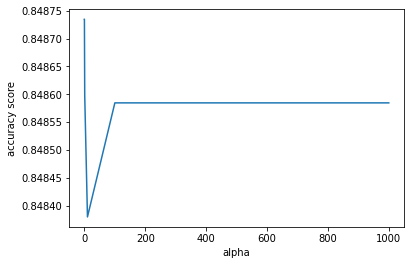

0.8485798291356929


In [ ]:
alpha = [.0001,.001,.1,1,10,100,1000]
acc_score = list()
for i in tqdm(alpha):
  classifier = MultinomialNB(alpha = i)
  classifier.fit(X_tr_set2,y_train)
  #a = classifier.transform(X_tr,y_train)
  #y_pred_proba = classifier.predict_proba(X_tr[0:10])
  y_pred = classifier.predict(X_tr_set2)
  acc_score.append(accuracy_score(y_train,y_pred))
print(acc_score)

#Best_alpha = 800
classifier = MultinomialNB(alpha = 800)
classifier.fit(X_tr_set2,y_train)
y_pred_test = classifier.predict(X_te_set2)
acc_score_test = accuracy_score(y_test,y_pred_test)

plt.plot(alpha,acc_score)
plt.xlabel('alpha')
plt.ylabel('accuracy score')
plt.show()

print(acc_score_test)

100%|██████████| 6/6 [00:00<00:00,  6.13it/s]


[0.7122451881892069, 0.7122447850796, 0.7122054873403472, 0.7118427184733391, 0.7081999861885206, 0.6735907232576445]


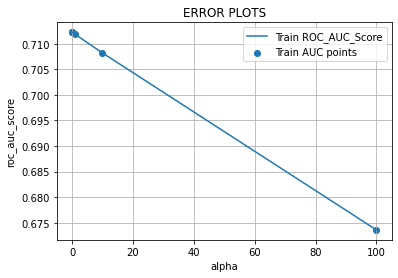

In [ ]:
from sklearn.metrics import roc_auc_score
alpha = [.0001,.001,.1,1,10,100]
train_roc_auc_score = list()
cv_roc_auc_score = list()
for i in tqdm(alpha):
  classifier = MultinomialNB(alpha = i)
  classifier.fit(X_tr_set1,y_train)
  y_train_pred = classifier.predict_proba(X_tr_set1)[:,1]
  #y_cv_pred = classifier.predict_proba(X_cr)
  #print(y_train_pred[0:2])
  train_roc_auc_score.append(roc_auc_score(y_train,y_train_pred))
  #cv_roc_auc_score.append(roc_auc_score(y_cv,y_cv_pred))
print(train_roc_auc_score)
#print(cv_roc_auc_score)

plt.plot(alpha,train_roc_auc_score,label = 'Train ROC_AUC_Score')
#plt.plot(alpha,cv_roc_auc_score,label = 'CV ROC_AUC_Score')

plt.scatter(alpha, train_roc_auc_score, label='Train AUC points')
#plt.scatter(alpha, cv_roc_auc_score, label='CV AUC points')

plt.xlabel('alpha')
plt.ylabel('roc_auc_score')
plt.title("ERROR PLOTS")
plt.grid()
plt.legend()
plt.show()

100%|██████████| 6/6 [00:00<00:00,  7.38it/s]


[0.7087882690961421, 0.7087709128670101, 0.7071138200631935, 0.6920514429334529, 0.6051575384374924, 0.5360739141136183]


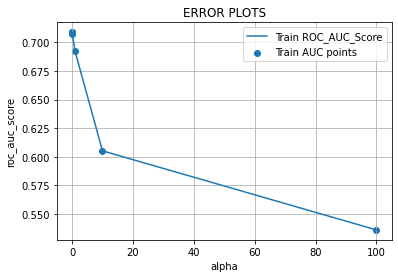

In [ ]:
alpha = [.0001,.001,.1,1,10,100]
train_roc_auc_score = list()
cv_roc_auc_score = list()
for i in tqdm(alpha):
  classifier = MultinomialNB(alpha = i)
  classifier.fit(X_tr_set2,y_train)
  y_train_pred = classifier.predict_proba(X_tr_set2)[:,1]
  #y_cv_pred = classifier.predict_proba(X_cr)
  #print(y_train_pred[0:2])
  train_roc_auc_score.append(roc_auc_score(y_train,y_train_pred))
  #cv_roc_auc_score.append(roc_auc_score(y_cv,y_cv_pred))
print(train_roc_auc_score)
#print(cv_roc_auc_score)

plt.plot(alpha,train_roc_auc_score,label = 'Train ROC_AUC_Score')
#plt.plot(alpha,cv_roc_auc_score,label = 'CV ROC_AUC_Score')

plt.scatter(alpha, train_roc_auc_score, label='Train AUC points')
#plt.scatter(alpha, cv_roc_auc_score, label='CV AUC points')

plt.xlabel('alpha')
plt.ylabel('roc_auc_score')
plt.title("ERROR PLOTS")
plt.grid()
plt.legend()
plt.show()

Best Parameter:  {'alpha': 1e-05}


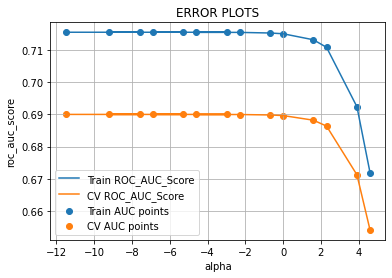

In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import math

Classifier = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':[0.00001,0.0005,0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
classifier = GridSearchCV(Classifier, parameters, cv=10, scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr_set1,y_train)

log_alpha = list()
for i in parameters['alpha']:
  log_alpha.append(math.log(i))

results = pd.DataFrame.from_dict(classifier.cv_results_)
results = results.sort_values(['param_alpha'])

#print(results.columns.values)
print('Best Parameter: ',classifier.best_params_)

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score'] 
alpha =  results['param_alpha']

plt.plot(log_alpha,train_auc,label = 'Train ROC_AUC_Score')
plt.plot(log_alpha,cv_auc,label = 'CV ROC_AUC_Score')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.xlabel('alpha')
plt.ylabel('roc_auc_score')
plt.title("ERROR PLOTS")
plt.grid()
plt.legend()
plt.show()

Best Parameter:  {'alpha': 0.0005}


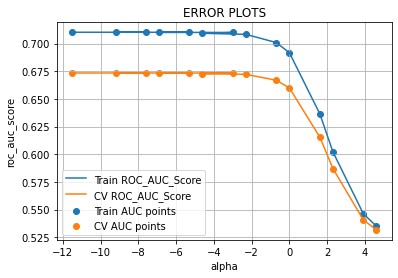

In [ ]:
Classifier = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':[0.00001,0.0005,0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
classifier = GridSearchCV(Classifier, parameters, cv=10, scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr_set2,y_train)

log_alpha = list()
for i in parameters['alpha']:
  log_alpha.append(math.log(i))

results = pd.DataFrame.from_dict(classifier.cv_results_)
results = results.sort_values(['param_alpha'])

#print(results.columns.values)
print('Best Parameter: ',classifier.best_params_)

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score'] 
alpha =  results['param_alpha']

plt.plot(log_alpha,train_auc,label = 'Train ROC_AUC_Score')
plt.plot(log_alpha,cv_auc,label = 'CV ROC_AUC_Score')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.xlabel('alpha')
plt.ylabel('roc_auc_score')
plt.title("ERROR PLOTS")
plt.grid()
plt.legend()
plt.show()

['mean_fit_time' 'std_fit_time' 'mean_score_time' 'std_score_time'
 'param_alpha' 'params' 'split0_test_score' 'split1_test_score'
 'split2_test_score' 'split3_test_score' 'split4_test_score'
 'split5_test_score' 'split6_test_score' 'split7_test_score'
 'split8_test_score' 'split9_test_score' 'mean_test_score'
 'std_test_score' 'rank_test_score' 'split0_train_score'
 'split1_train_score' 'split2_train_score' 'split3_train_score'
 'split4_train_score' 'split5_train_score' 'split6_train_score'
 'split7_train_score' 'split8_train_score' 'split9_train_score'
 'mean_train_score' 'std_train_score']
{'alpha': 19}
2    19
5    36
6    40
4    62
0    77
9    78
3    80
8    80
1    84
7    91
Name: param_alpha, dtype: object
2    0.706520
5    0.698634
6    0.696813
4    0.687136
0    0.680904
9    0.680499
3    0.679693
8    0.679693
1    0.678096
7    0.675350
Name: mean_train_score, dtype: float64


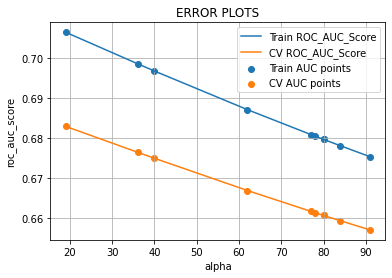

In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

Classifier = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':sp_randint(1,100)}
classifier = RandomizedSearchCV(Classifier, parameters, cv=10, scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr_set1,y_train)

results = pd.DataFrame.from_dict(classifier.cv_results_)
results = results.sort_values(['param_alpha'])

print(results.columns.values)
print(classifier.best_params_)

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score'] 
alpha =  results['param_alpha']

print(alpha)
print(train_auc)

plt.plot(alpha,train_auc,label = 'Train ROC_AUC_Score')
plt.plot(alpha,cv_auc,label = 'CV ROC_AUC_Score')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')

plt.xlabel('alpha')
plt.ylabel('roc_auc_score')
plt.title("ERROR PLOTS")
plt.grid()
plt.legend()
plt.show()

['mean_fit_time' 'std_fit_time' 'mean_score_time' 'std_score_time'
 'param_alpha' 'params' 'split0_test_score' 'split1_test_score'
 'split2_test_score' 'split3_test_score' 'split4_test_score'
 'split5_test_score' 'split6_test_score' 'split7_test_score'
 'split8_test_score' 'split9_test_score' 'mean_test_score'
 'std_test_score' 'rank_test_score' 'split0_train_score'
 'split1_train_score' 'split2_train_score' 'split3_train_score'
 'split4_train_score' 'split5_train_score' 'split6_train_score'
 'split7_train_score' 'split8_train_score' 'split9_train_score'
 'mean_train_score' 'std_train_score']
{'alpha': 4}
5     4
2    27
7    36
8    42
3    48
9    49
6    58
4    79
0    87
1    93
Name: param_alpha, dtype: object
5    0.647081
2    0.562213
7    0.553972
8    0.550146
3    0.547142
9    0.546704
6    0.543349
4    0.538201
0    0.536835
1    0.535953
Name: mean_train_score, dtype: float64


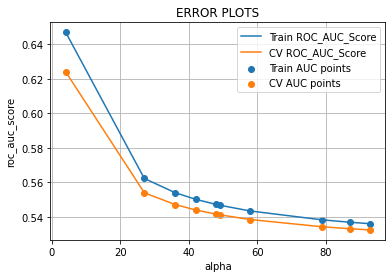

In [ ]:
Classifier = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':sp_randint(1,100)}
classifier = RandomizedSearchCV(Classifier, parameters, cv=10, scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr_set2,y_train)

results = pd.DataFrame.from_dict(classifier.cv_results_)
results = results.sort_values(['param_alpha'])

print(results.columns.values)
print(classifier.best_params_)

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score'] 
alpha =  results['param_alpha']

print(alpha)
print(train_auc)

plt.plot(alpha,train_auc,label = 'Train ROC_AUC_Score')
plt.plot(alpha,cv_auc,label = 'CV ROC_AUC_Score')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')

plt.xlabel('alpha')
plt.ylabel('roc_auc_score')
plt.title("ERROR PLOTS")
plt.grid()
plt.legend()
plt.show()

In [ ]:
import numpy as np

classifier = MultinomialNB()
classifier.fit(X_tr,y_train)
y_predict = classifier.predict_proba(X_tr)
y_pred = classifier.predict(X_tr)
print(y_predict.shape,y_train.shape)
print(type(y_predict[0]))
print(y_predict[:,1])
d=pd.Series(y_pred)
print(np.sum(y_predict[0]))
print(type(d))
print(d.value_counts())

(49041, 2) (49041,)
<class 'numpy.ndarray'>
[0.99999685 0.99999998 0.98486097 ... 0.99628147 0.99445046 0.51136095]
0.9999999999999108
<class 'pandas.core.series.Series'>
1    34369
0    14672
dtype: int64


In [ ]:
#results[['param_alpha','mean_train_score','mean_test_score']]
results['param_alpha'][(results['mean_test_score'] == max(results['mean_test_score']))]

1    28
Name: param_alpha, dtype: object

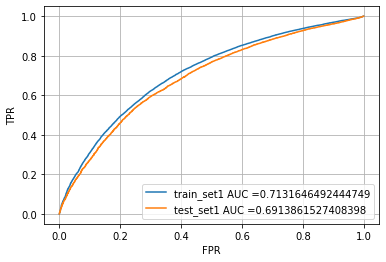

In [ ]:
from sklearn.metrics import roc_curve, auc
Classifier = MultinomialNB(alpha = 1e-05,class_prior=[0.5,0.5])
classifier.fit(X_tr_set1,y_train)
y_train_pred_set1 = classifier.predict_proba(X_tr_set1)[:,1]
y_test_pred_set1 = classifier.predict_proba(X_te_set1)[:,1]

y_train_fpr_set1,y_train_tpr_set1,tr_threshold_set1 = roc_curve(y_train,y_train_pred_set1)
y_test_fpr_set1,y_test_tpr_set1,test_threshold_set1 = roc_curve(y_test,y_test_pred_set1)

plt.plot(y_train_fpr_set1,y_train_tpr_set1, label="train_set1 AUC ="+str(auc(y_train_fpr_set1, y_train_tpr_set1)))
plt.plot(y_test_fpr_set1,y_test_tpr_set1, label="test_set1 AUC ="+str(auc(y_test_fpr_set1, y_test_tpr_set1)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()




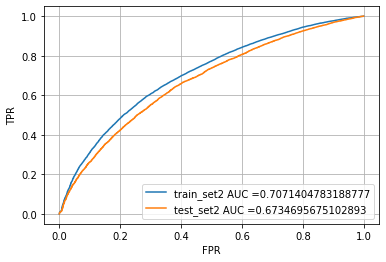

In [ ]:
Classifier = MultinomialNB(alpha = .0005,class_prior=[0.5,0.5])
classifier.fit(X_tr_set2,y_train)
y_train_pred_set2 = classifier.predict_proba(X_tr_set2)[:,1]
y_test_pred_set2 = classifier.predict_proba(X_te_set2)[:,1]

y_train_fpr_set2,y_train_tpr_set2,tr_threshold_set2 = roc_curve(y_train,y_train_pred_set2)
y_test_fpr_set2,y_test_tpr_set2,test_threshold_set2 = roc_curve(y_test,y_test_pred_set2)

plt.plot(y_train_fpr_set2,y_train_tpr_set2, label="train_set2 AUC ="+str(auc(y_train_fpr_set2, y_train_tpr_set2)))
plt.plot(y_test_fpr_set2,y_test_tpr_set2, label="test_set2 AUC ="+str(auc(y_test_fpr_set2, y_test_tpr_set2)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
def find_best_threshold(fpr,tpr,tr_threshold):
  t= tr_threshold[np.argmax(tpr*(1-fpr))]
  return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
best_threshold_set1 = find_best_threshold(y_train_fpr_set1,y_train_tpr_set1,tr_threshold_set1)
print(best_threshold_set1)
best_threshold_set2 = find_best_threshold(y_train_fpr_set2,y_train_tpr_set2,tr_threshold_set2)
print(best_threshold_set2)

print('='*100)
from sklearn.metrics import confusion_matrix
#print("Train confusion matrix")
#print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_threshold)))
print('Confusion Matrix for BOW')
print('-'*100)
print("Train confusion matrix_Set1")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred_set1, best_threshold_set1)))
print("Test confusion matrix_Set1")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred_set1, best_threshold_set1)))

print('Confusion Matrix for TF-IDF')
print('-'*100)
print("Train confusion matrix_Set2")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred_set2, best_threshold_set2)))
print("Test confusion matrix_Set2")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred_set2, best_threshold_set2)))
#print(np.sum(confusion_matrix(y_test, predict_with_best_t(y_test_pred_set2, best_threshold_set2)).reshape(1,-1)))

0.4423720830982443
0.5042960341041971
Confusion Matrix for BOW
----------------------------------------------------------------------------------------------------
Train confusion matrix_Set1
[[ 7352  3731]
 [21072 41041]]
Test confusion matrix_Set1
[[ 3457  2002]
 [10581 20012]]
Confusion Matrix for TF-IDF
----------------------------------------------------------------------------------------------------
Train confusion matrix_Set2
[[ 7372  3711]
 [22211 39902]]
Test confusion matrix_Set2
[[ 3411  2048]
 [11130 19463]]


Confusion Matrix with Heatmap for BOW
----------------------------------------------------------------------------------------------------
Train confusion matrix_Set1


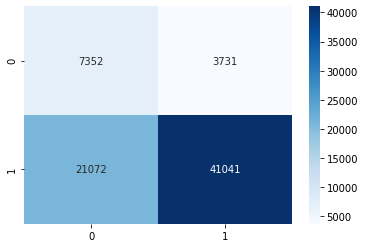

Test confusion matrix_Set1


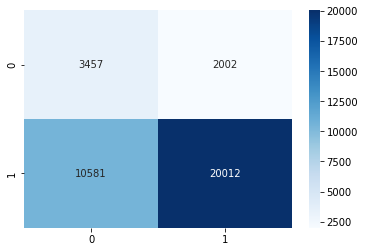

Confusion Matrix with Heatmap for TF-IDF
----------------------------------------------------------------------------------------------------
Train confusion matrix_Set2


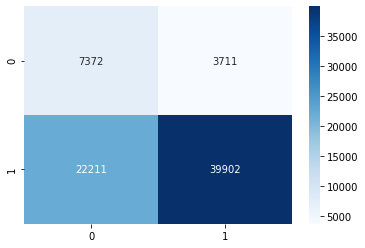

Test confusion matrix_Set2


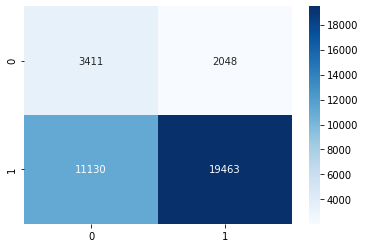

In [ ]:
import seaborn as sns
print('Confusion Matrix with Heatmap for BOW')
print('-'*100)
print('Train confusion matrix_Set1')
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred_set1, best_threshold_set1)),fmt='d', annot=True,cmap='Blues')
plt.show()
print('Test confusion matrix_Set1')
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred_set1, best_threshold_set1)),fmt='d', annot=True,cmap='Blues')
plt.show()

print('Confusion Matrix with Heatmap for TF-IDF')
print('-'*100)
print('Train confusion matrix_Set2')
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred_set2, best_threshold_set2)),fmt='d', annot=True,cmap='Blues')
plt.show()
print('Test confusion matrix_Set2')
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred_set2, best_threshold_set2)),fmt='d', annot=True,cmap='Blues')
plt.show()

In [ ]:
NB = MultinomialNB(alpha =1e-05,class_prior=[0.5,0.5])
NB.fit(X_tr_set1,y_train)
'''Best_Features_positive = NB.feature_log_prob_[1,].argsort()[::-1][:20]
Best_Features_positive = list(Best_Features_positive)
Best_Features_Negative = NB.feature_log_prob_[0,].argsort()[::-1][:20]
Best_Features_Negative = list(Best_Features_Negative)
#print(Best_Features_Negative)'''

Best_Features_positive = pd.DataFrame({'Features_BOW':Features_BOW,'Log-Probabilities':NB.feature_log_prob_[1,]})
Best_Features_positive.sort_values(by=['Log-Probabilities'],ascending=False,inplace=True)

Best_Features_Negative = pd.DataFrame({'Features_BOW':Features_BOW,'Log-Probabilities':NB.feature_log_prob_[0,]})
Best_Features_Negative.sort_values(by=['Log-Probabilities'],ascending=False,inplace=True)

Features_BOW=list()
for i in vectorizer_essay.get_feature_names():
  Features_BOW.append(i)
for i in vectorizer_School_State.get_feature_names():
  Features_BOW.append(i)
for i in vectorizer_Teacher_Prefix.get_feature_names():
  Features_BOW.append(i)
for i in vectorizer_Project_Grade_Cat.get_feature_names():
  Features_BOW.append(i)
for i in vectorizer_Clean_Cat.get_feature_names():
  Features_BOW.append(i)
for i in vectorizer_clean_subcategories.get_feature_names():
  Features_BOW.append(i)
Features_BOW.append('teacher_number_of_previously_posted_projects')
Features_BOW.append('price')
#print('Best Positive Features\n','-'*100,'\n',np.take(Features_tfidf,Best_Features_positive))
print('Top 20 Positive Features\n','-'*100,'\n',Best_Features_positive['Features_BOW'][:20].values)
print('\n')
#print('Best Negative Features\n','-'*100,'\n',np.take(Features_tfidf,Best_Features_Negative))
print('Top 20 Negative Features\n','-'*100,'\n',Best_Features_Negative['Features_BOW'][:20].values)

Top 20 Positive Features
 ---------------------------------------------------------------------------------------------------- 
 ['students' 'school' 'my' 'learning' 'classroom' 'the' 'they' 'not'
 'my students' 'learn' 'help' 'many' 'nannan' 'we' 'need' 'reading' 'work'
 'use' 'love' 'day']


Top 20 Negative Features
 ---------------------------------------------------------------------------------------------------- 
 ['students' 'school' 'learning' 'my' 'classroom' 'not' 'learn' 'they'
 'help' 'the' 'my students' 'nannan' 'many' 'we' 'need' 'work' 'come'
 'reading' 'love' 'materials']


In [ ]:
a = np.array([1,5,3])
print(a)
print(a.argsort())

[1 5 3]
[0 2 1]


In [ ]:
NB = MultinomialNB(alpha =.0005,class_prior=[0.5,0.5])
NB.fit(X_tr_set2,y_train)
'''Best_Features_positive = NB.feature_log_prob_[1,][::-1].argsort()[:20]
Best_Features_positive = list(Best_Features_positive)
Best_Features_Negative = NB.feature_log_prob_[0,][::-1].argsort()[:20]
Best_Features_Negative = list(Best_Features_Negative)'''

Best_Features_positive = pd.DataFrame({'Features_TFIDF':Features_tfidf,'Log-Probabilities':NB.feature_log_prob_[1,]})
Best_Features_positive.sort_values(by=['Log-Probabilities'],ascending=False,inplace=True)

Best_Features_Negative = pd.DataFrame({'Features_TFIDF':Features_tfidf,'Log-Probabilities':NB.feature_log_prob_[0,]})
Best_Features_Negative.sort_values(by=['Log-Probabilities'],ascending=False,inplace=True)

Features_tfidf=list()
for i in TfidfVectorizer.get_feature_names():
  Features_tfidf.append(i)
for i in vectorizer_School_State.get_feature_names():
  Features_tfidf.append(i)
for i in vectorizer_Teacher_Prefix.get_feature_names():
  Features_tfidf.append(i)
for i in vectorizer_Project_Grade_Cat.get_feature_names():
  Features_tfidf.append(i)
for i in vectorizer_Clean_Cat.get_feature_names():
  Features_tfidf.append(i)
for i in vectorizer_clean_subcategories.get_feature_names():
  Features_tfidf.append(i)
Features_tfidf.append('teacher_number_of_previously_posted_projects')
Features_tfidf.append('price')
#print('Best Positive Features\n','-'*100,'\n',np.take(Features_tfidf,Best_Features_positive))
print('Top 20 Positive Features\n','-'*100,'\n',Best_Features_positive['Features_TFIDF'][:20].values)
print('\n')
#print('Best Negative Features\n','-'*100,'\n',np.take(Features_tfidf,Best_Features_Negative))
print('Top 20 Negative Features\n','-'*100,'\n',Best_Features_Negative['Features_TFIDF'][:20].values)

Top 20 Positive Features
 ---------------------------------------------------------------------------------------------------- 
 ['mrs' 'literacy_language' 'grades_prek_2' 'math_science' 'ms'
 'grades_3_5' 'literacy' 'mathematics' 'literature_writing' 'grades_6_8'
 'ca' 'students' 'health_sports' 'specialneeds' 'specialneeds'
 'appliedlearning' 'grades_9_12' 'appliedsciences' 'mr' 'health_wellness']


Top 20 Negative Features
 ---------------------------------------------------------------------------------------------------- 
 ['mrs' 'literacy_language' 'grades_prek_2' 'math_science' 'ms'
 'grades_3_5' 'mathematics' 'literacy' 'literature_writing' 'grades_6_8'
 'specialneeds' 'specialneeds' 'students' 'ca' 'appliedlearning'
 'health_sports' 'appliedsciences' 'grades_9_12' 'mr' 'music_arts']


In [ ]:
#pretty table
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizor", "Model", "Hyperparameter", "AUC"]
x.add_row(['BOW','Naive-Bayes',1e-05,0.69])
x.add_row(['TF-IDF','Naive-Bayes',.0005,0.67])
print(x)

+------------+-------------+----------------+------+
| Vectorizor |    Model    | Hyperparameter | AUC  |
+------------+-------------+----------------+------+
|    BOW     | Naive-Bayes |     1e-05      | 0.69 |
|   TF-IDF   | Naive-Bayes |     0.0005     | 0.67 |
+------------+-------------+----------------+------+


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions